# **📝Setup & Data Loading**
**- Import Libraries**

We start by importing the essential Python libraries for data handling, visualization, and preprocessing.  

**- Mount Google Drive**

Next, we mount Google Drive so that Colab can access the dataset stored in `MyDrive`.  

**- Define Column Names**

Since the original dataset does not contain headers, we manually define meaningful column names like `age`, `sex`, `cp`, `chol`, etc.  

**- Load the Dataset**

We read the Excel file `processed.cleveland.xlsx` from Google Drive, replace `?` values with `NaN`, and assign the predefined column names.  


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs",
    "restecg", "thalach", "exang", "oldpeak", "slope",
    "ca", "thal", "num"
]

df = pd.read_excel(
    '../data/raw/with_missing_values.xlsx',
    names=columns,
    na_values='?',
    engine='openpyxl',
    header=None
)

**👀 Preview the Data**

Finally, we display the first 10 rows to make sure the dataset has been loaded correctly.  

In [4]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


## 🧩 Missing Values Handling  

**Dataset:** Cleveland Heart Disease dataset (303 rows, 14 features).  

**Columns with missing values:**  
- `ca` → number of major vessels colored by fluoroscopy  
- `thal` → thalassemia test result  

**How missing values were detected:**  
In the raw dataset, missing values were encoded as `"?"`.  
These were automatically converted to `NaN` using the `na_values="?"` parameter in `pandas.read_excel`.  

**Imputation strategy:**  
- Replaced missing values with the **mode** (most frequent value).  

**Reasoning:**  
- `ca` is a discrete numeric feature (0–3).  
- `thal` is a categorical feature.  
Using the mode preserves the most common category/value without introducing bias from mean or median.  


In [5]:
missing_report = df.isnull().sum()
#df:dataframe, isnull() returns T when missing, and F when not, sum() sum all true
print(missing_report)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


In [6]:
missing_rows = df[df.isna().any(axis=1)]
missing_rows.head(6)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
87,53,0,3,128,216,0,2,115,0,0.0,1,0.0,NaN,0
166,52,1,3,138,223,0,0,169,0,0.0,1,NaN,3.0,0
192,43,1,4,132,247,1,2,143,1,0.1,2,NaN,7.0,1
266,52,1,4,128,204,1,0,156,1,1.0,2,0.0,NaN,2
287,58,1,2,125,220,0,0,144,0,0.4,2,NaN,7.0,0
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


In [7]:
for col in ['ca', 'thal']:
    df[col] = df[col].fillna(df[col].mode()[0])

print(df.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


# **🎯 Target Variable Transformation**

- **Original target column:** `num` (values 0–4).  
- **Converted into binary target (`target_binary`):**  
  - `0` → no heart disease  
  - `1` → presence of heart disease (values > 0)  

In [8]:
df['target_binary'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# **🔢 Feature Encoding & Scaling**

- **Categorical Encoding**:  
  The categorical columns (`sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `thal`) are transformed using **One-Hot Encoding** with `pd.get_dummies()`.  
  This converts categories into binary variables while avoiding the dummy variable trap by dropping the first category.  

- **Feature Matrix & Target Variable**:  
  - `X` → features (all columns except `num` and `target_binary`)  
  - `y` → binary target variable (`target_binary`)  

- **Numerical Scaling**:  
  The numerical features (`age`, `trestbps`, `chol`, `thalach`, `oldpeak`, `ca`) are standardized using **StandardScaler** so they share a common scale (mean = 0, std = 1).  

In [10]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [9]:
X = df.drop(['num', 'target_binary'], axis=1)
y = df['target_binary']

In [11]:
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [12]:
print("✅ Data preprocessing done successfully!")
print("X shape:", X.shape)
print("y distribution:\n", y.value_counts())
X.head()

✅ Data preprocessing done successfully!
X shape: (303, 13)
y distribution:
 target_binary
0    164
1    139
Name: count, dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.948726,1,1,0.757525,-0.264900,1,2,0.017197,0,1.087338,3,-0.711131,6.0
1,1.392002,1,4,1.611220,0.760415,0,2,-1.821905,1,0.397182,2,2.504881,3.0
2,1.392002,1,4,-0.665300,-0.342283,0,2,-0.902354,1,1.346147,2,1.432877,7.0
3,-1.932564,1,3,-0.096170,0.063974,0,0,1.637359,0,2.122573,3,-0.711131,3.0
4,-1.489288,0,2,-0.096170,-0.825922,0,2,0.980537,0,0.310912,1,-0.711131,3.0


# **📊 Exploratory Data Analysis – Histograms**

We plot histograms for the numerical features (`age`, `trestbps`, `chol`, `thalach`, `oldpeak`, `ca`).  
Histograms help us understand:  
- The **distribution** of each feature  
- Whether the data is **skewed** or normally distributed  
- The presence of potential **outliers**  

In [ ]:
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

df[numerical_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

# ** Correlation Heatmap**  

We visualize the correlation matrix of all features using a heatmap:  

- **Positive correlations** (closer to +1) indicate that two features increase together.  
- **Negative correlations** (closer to –1) indicate an inverse relationship.  
- Values near **0** suggest little or no correlation.  

This helps us identify relationships between features (e.g., `chol` vs `age`) and check how strongly features relate to the target variable.  

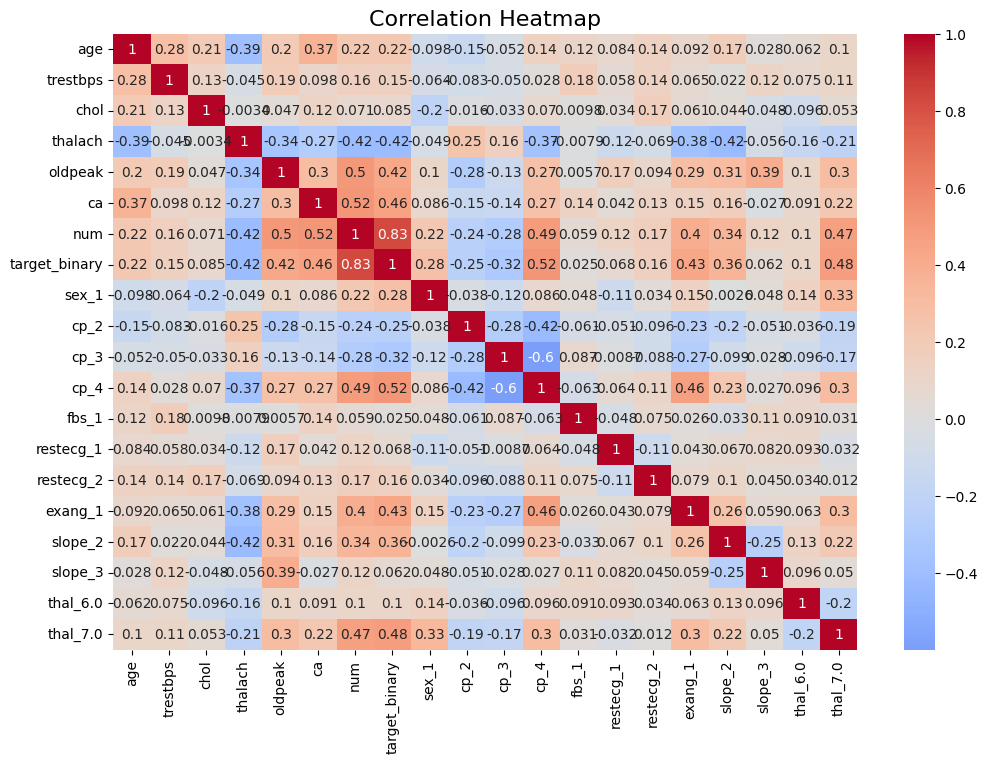

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

# **Boxplots vs Target**

We use boxplots to compare the distribution of each numerical feature across the two target classes (`0` = no heart disease, `1` = heart disease).  

Boxplots reveal:  
- **Median differences** between classes  
- **Spread of data** (interquartile range)  
- Potential **outliers** in each group  

This helps us check which features show clear separation between healthy and diseased patients.  

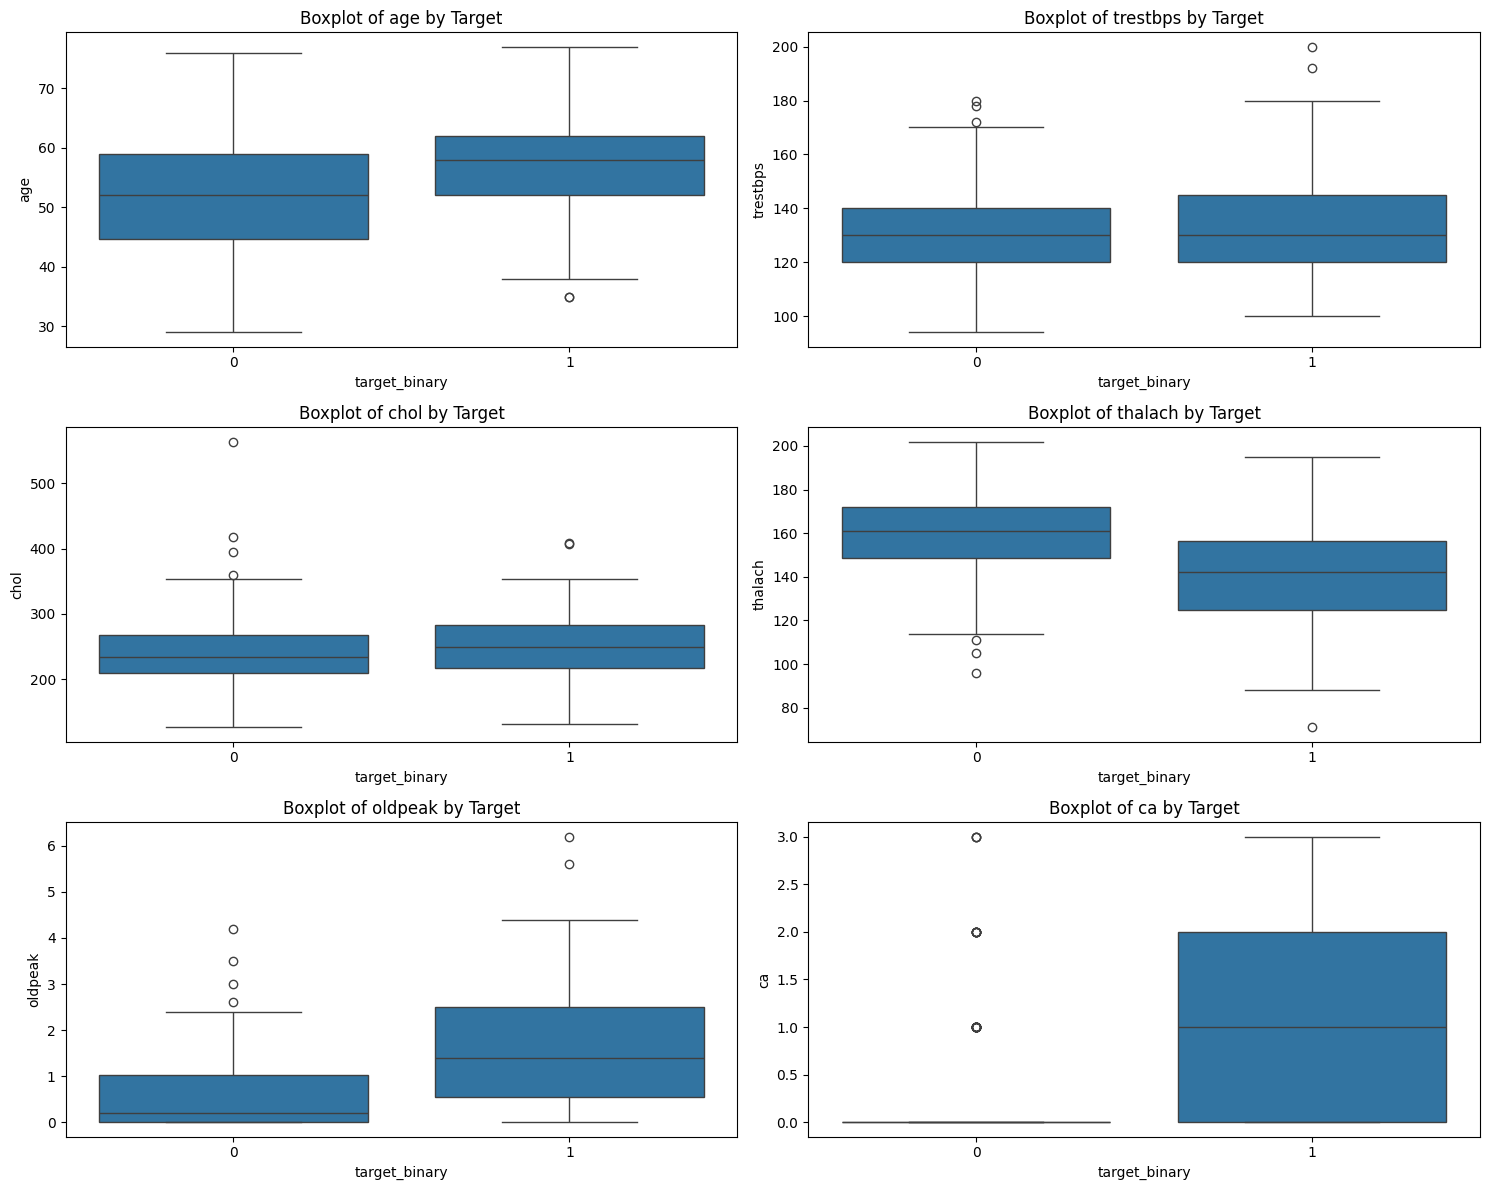

In [14]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x="target_binary", y=col, data=df)
    plt.title(f"Boxplot of {col} by Target")
plt.tight_layout()
plt.show()

In [15]:
X.to_csv("../data/processed/processed_X.csv", index=False)
y.to_csv("../data/processed/processed_y.csv", index=False)